In [1]:
#### conda env Weather_Prediction

import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', None)

In [2]:
## year to plot and estimate
select_year=2019
year=str(select_year)
PATH_3=os.path.join('..','Results','CAMS_with_LE', 'LE_'+year +'.csv') ## read the life expectancy data
le=pd.read_csv(PATH_3)
le

,location_name,fips,year,MeanLifeExpectency
0,Autauga County (Alabama),1001,2019,76.593265140000000
1,Baldwin County (Alabama),1003,2019,78.293522339999996
2,Barbour County (Alabama),1005,2019,74.814532090000000
3,Bibb County (Alabama),1007,2019,73.920053800000005
4,Blount County (Alabama),1009,2019,75.029185549999994
...,...,...,...,...
3122,Sweetwater County (Wyoming),56037,2019,78.018891969999999
3123,Teton County (Wyoming),56039,2019,85.638149490000004
3124,Uinta County (Wyoming),56041,2019,77.521690719999995
3125,Washakie County (Wyoming),56043,2019,78.137158389999996


In [3]:
## load the county shapefile


if select_year==2003:
        
    SHAPE_PATH=os.path.join('..','Shapefiles','county_shapefiles','2008_county_shapefile',
                        'tl_2008_us_county.shp')
    county_gdf = gpd.read_file(SHAPE_PATH)
    county_gdf['fips']=county_gdf['STATEFP'] + county_gdf['COUNTYFP']
    county_gdf.dtypes
    ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
    
elif select_year==2019:

    SHAPE_PATH=os.path.join('..','Shapefiles','county_shapefiles','2019_county_shapefile',
                        'cb_2019_us_county_500k.shp')
    county_gdf = gpd.read_file(SHAPE_PATH)
    county_gdf['fips']=county_gdf['STATEFP'] + county_gdf['COUNTYFP']
    county_gdf.dtypes
        ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)

else:
    print('no year exist')

In [4]:
county_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,fips
0,48,081,01383826,0500000US48081,48081,Coke,06,2361153195,42331832,"POLYGON ((-100.82497 31.74941, -100.82415 31.8...",48081
1,48,273,01383922,0500000US48273,48273,Kleberg,06,2282572445,541041659,"MULTIPOLYGON (((-97.31780 27.49456, -97.31590 ...",48273
2,48,203,01383887,0500000US48203,48203,Harrison,06,2331138836,40651525,"POLYGON ((-94.70215 32.45618, -94.70197 32.467...",48203
3,48,223,01383897,0500000US48223,48223,Hopkins,06,1987629163,65639829,"POLYGON ((-95.86333 33.04989, -95.86302 33.065...",48223
4,48,033,01383802,0500000US48033,48033,Borden,06,2324366073,22297606,"POLYGON ((-101.69128 32.96184, -101.55743 32.9...",48033
...,...,...,...,...,...,...,...,...,...,...,...
3228,20,119,00485024,0500000US20119,20119,Meade,06,2533222397,3258258,"POLYGON ((-100.65264 37.41669, -100.65264 37.4...",20119
3229,38,049,01035305,0500000US38049,38049,McHenry,06,4853487956,97323497,"POLYGON ((-101.05991 48.38598, -101.05988 48.4...",38049
3230,72,119,01804540,0500000US72119,72119,Río Grande,13,157008568,74876349,"POLYGON ((-65.87666 18.36314, -65.87598 18.364...",72119
3231,46,021,01266974,0500000US46021,46021,Campbell,06,1900214169,96243697,"POLYGON ((-100.49935 45.94363, -100.46284 45.9...",46021


In [5]:
## convert dtype to int

county_gdf['STATEFP']=county_gdf['STATEFP'].astype(str).astype(int) 
county_gdf.dtypes

county_gdf=county_gdf.loc[:,['STATEFP','geometry','fips']]
county_gdf.dtypes

STATEFP        int32
geometry    geometry
fips           int32
dtype: object

In [6]:
## load state shapefile

SHAPE_PATH = os.path.join('..','Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)

## include only contiguous shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [7]:
## convert dtype to int

state_shape['STATEFP']=state_shape['STATEFP'].astype(str).astype(int) 
state_shape=state_shape.loc[:,['STATEFP','geometry']]
state_shape.dtypes

## this step is necessary because there are two columns named geometry
state_shape_to_merge=state_shape.rename(columns={'geometry':'state_geometry'}) 

In [8]:
gpd_df_initial = pd.merge(county_gdf, state_shape_to_merge, on='STATEFP', how='left') 
gpd_df_initial
gpd_df_initial=gpd_df_initial.dropna()
gpd_df_initial
## It is VERY IMPORTANT that the left dataframe that is merged is a Geopandas Dataframe
## Not pandas dataframe. While a Geopandas dataframe can be easily plotted, a pandas  
## even if it consists Geometry column, geopandas will not recognize it and it will not be plotted

,STATEFP,geometry,fips,state_geometry
0,48,"POLYGON ((-100.82497 31.74941, -100.82415 31.8...",48081,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
1,48,"MULTIPOLYGON (((-97.31780 27.49456, -97.31590 ...",48273,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
2,48,"POLYGON ((-94.70215 32.45618, -94.70197 32.467...",48203,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
3,48,"POLYGON ((-95.86333 33.04989, -95.86302 33.065...",48223,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
4,48,"POLYGON ((-101.69128 32.96184, -101.55743 32.9...",48033,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."
...,...,...,...,...
3227,55,"POLYGON ((-89.00953 43.32347, -89.00935 43.327...",55027,"MULTIPOLYGON (((-86.95617 45.35549, -86.95463 ..."
3228,20,"POLYGON ((-100.65264 37.41669, -100.65264 37.4...",20119,"POLYGON ((-102.05174 40.00308, -101.91670 40.0..."
3229,38,"POLYGON ((-101.05991 48.38598, -101.05988 48.4...",38049,"POLYGON ((-104.04868 48.86378, -104.04865 48.8..."
3231,46,"POLYGON ((-100.49935 45.94363, -100.46284 45.9...",46021,"POLYGON ((-104.05788 44.99761, -104.05078 44.9..."


In [9]:
gpd_df_initial = gpd_df_initial.drop('state_geometry', axis=1)

In [10]:
gpd_df = pd.merge(gpd_df_initial, le, on='fips', how='left') ## merge dataframes to plot
gpd_df= gpd_df.dropna()
gpd_df 

,STATEFP,geometry,fips,location_name,year,MeanLifeExpectency
0,48,"POLYGON ((-100.82497 31.74941, -100.82415 31.8...",48081,Coke County (Texas),2019.0,76.466868939999998
1,48,"MULTIPOLYGON (((-97.31780 27.49456, -97.31590 ...",48273,Kleberg County (Texas),2019.0,75.847136879999994
2,48,"POLYGON ((-94.70215 32.45618, -94.70197 32.467...",48203,Harrison County (Texas),2019.0,76.379998970000003
3,48,"POLYGON ((-95.86333 33.04989, -95.86302 33.065...",48223,Hopkins County (Texas),2019.0,76.396822799999995
5,48,"POLYGON ((-94.51143 31.97398, -94.49257 31.974...",48419,Shelby County (Texas),2019.0,74.540781999999993
...,...,...,...,...,...,...
3102,55,"POLYGON ((-89.00953 43.32347, -89.00935 43.327...",55027,Dodge County (Wisconsin),2019.0,78.663355050000007
3103,20,"POLYGON ((-100.65264 37.41669, -100.65264 37.4...",20119,Meade County (Kansas),2019.0,78.099653149999995
3104,38,"POLYGON ((-101.05991 48.38598, -101.05988 48.4...",38049,McHenry County (North Dakota),2019.0,80.019036229999998
3105,46,"POLYGON ((-100.49935 45.94363, -100.46284 45.9...",46021,Campbell County (South Dakota),2019.0,83.297983849999994


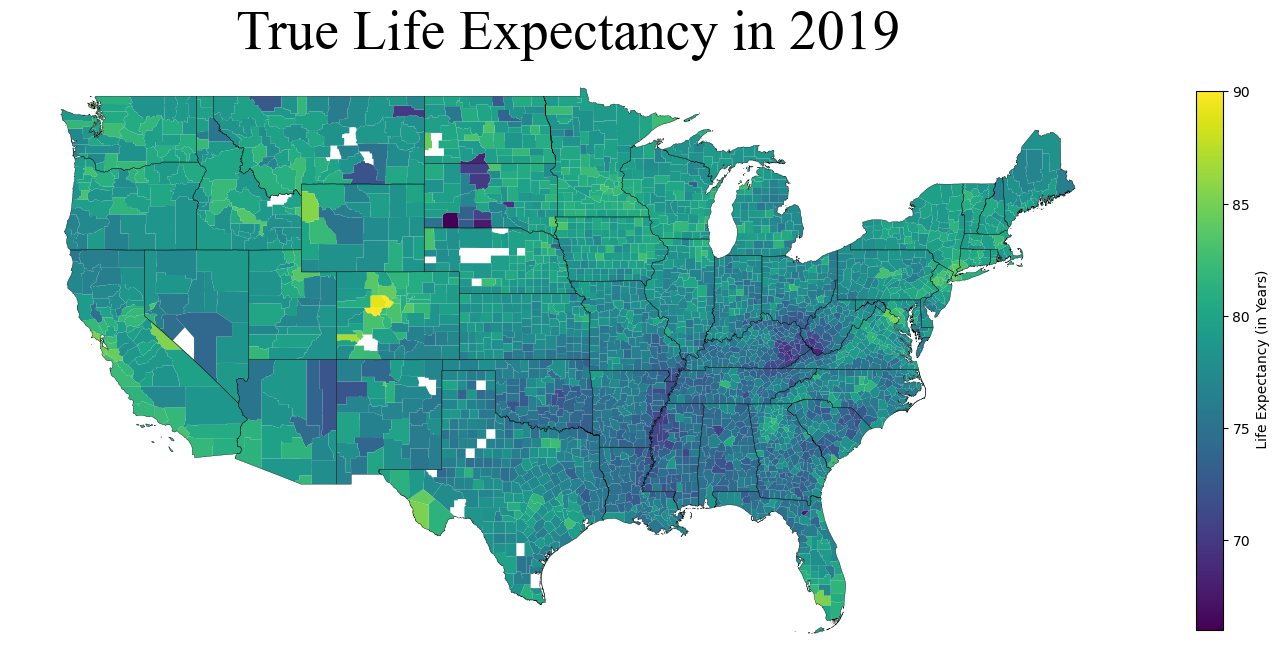

In [11]:
## plot the county shape file
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off') ## remove axis box from map 

gpd_df.plot(ax=ax,column='MeanLifeExpectency', legend=True, legend_kwds={"label": " Life Expectancy (in Years)", 
                                                                               "shrink":0.50}, vmin=66, vmax=90)

## overlay state shapefile
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
hfont = {'fontname':'Times New Roman'}
ax.set_title('True Life Expectancy in '+ year, **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})

#PATH_2=os.path.join('..','Figures','True_'+str(i))
plt.savefig('True_'+year)
